In [1]:
import pandas as pd
import os

In [2]:
os.getcwd()

'C:\\Users\\adbha\\Python A-Z'

In [3]:
movie = pd.read_csv("Movie-Ratings.csv")

In [4]:
movie

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [5]:
movie.columx

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [6]:
movie.columns = ['Film', 'Genre', 'CriticRating', 'AudienceRating', \
                 'BudgetMillions', 'Year']

In [7]:
movie

,Film,Genre,CriticRating,AudienceRating,BudgetMillions,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009
...,...,...,...,...,...,...
554,Your Highness,Comedy,26,36,50,2011
555,Youth in Revolt,Comedy,68,52,18,2009
556,Zodiac,Thriller,89,73,65,2007
557,Zombieland,Action,90,87,24,2009


In [8]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Film            559 non-null    object
 1   Genre           559 non-null    object
 2   CriticRating    559 non-null    int64 
 3   AudienceRating  559 non-null    int64 
 4   BudgetMillions  559 non-null    int64 
 5   Year            559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [9]:
#Changing Dtype to category
movie.Film=movie.Film.astype('category')
movie.Genre=movie.Genre.astype('category')
movie.Year=movie.Year.astype('category')

In [10]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Film            559 non-null    category
 1   Genre           559 non-null    category
 2   CriticRating    559 non-null    int64   
 3   AudienceRating  559 non-null    int64   
 4   BudgetMillions  559 non-null    int64   
 5   Year            559 non-null    category
dtypes: category(3), int64(3)
memory usage: 40.3 KB


In [11]:
#Code for getting just the categories
movie.Year.cat.categories

Int64Index([2007, 2008, 2009, 2010, 2011], dtype='int64')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

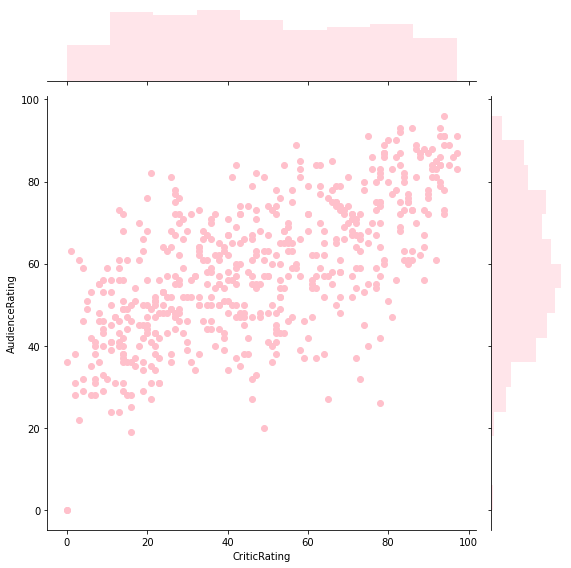

In [13]:
j = sns.jointplot(data=movie,x='CriticRating',y='AudienceRating',color='Pink',height=8)

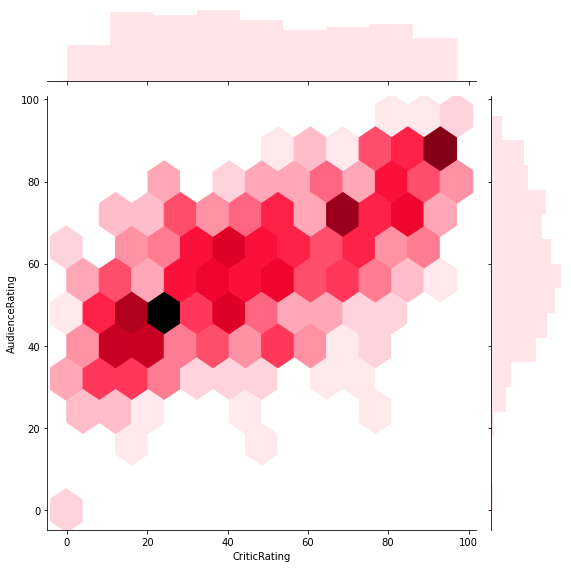

In [14]:
j = sns.jointplot(data=movie,x='CriticRating',y='AudienceRating',color='Pink',height=8, kind = 'hex')

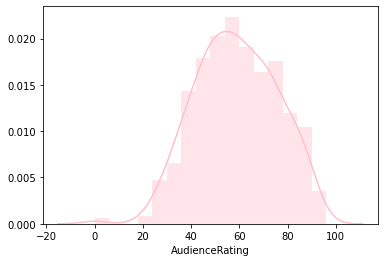

In [15]:
m1 = sns.distplot(movie.AudienceRating, color="pink",bins=16)

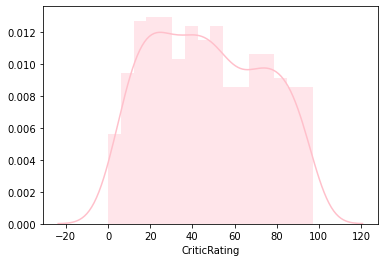

In [16]:
m1 = sns.distplot(movie.CriticRating, color="pink",bins=16)

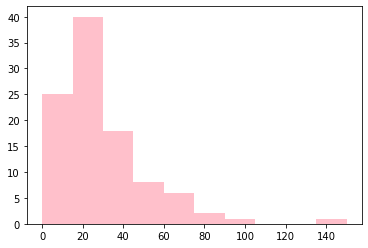

In [17]:
plt.hist(movie[movie.Genre == 'Drama'].BudgetMillions, color = "pink")
plt.show()

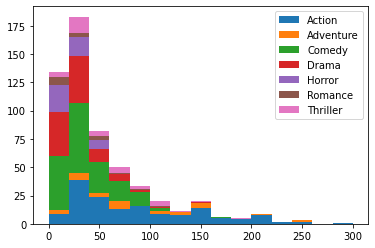

In [18]:
#Stacked Histogram
genlist=[]
genlabel=[]
for gen in movie.Genre.cat.categories :
    genlist.append(movie[movie.Genre == gen].BudgetMillions)
    genlabel.append(gen)
    
plt.hist(genlist, bins = 15, stacked = True, label=genlabel)
plt.legend()
plt.show()

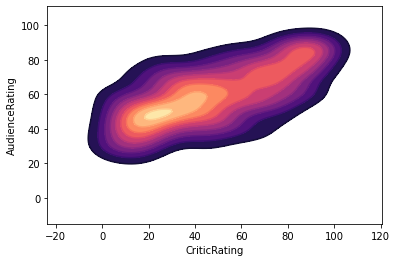

In [19]:
#KDE plot
k1 = sns.kdeplot(movie.CriticRating,movie.AudienceRating,shade=True, shade_lowest=False, cmap = 'magma' )
k1b = sns.kdeplot(movie.CriticRating,movie.AudienceRating,cmap = 'magma' ) #Added just to give a more defined outline

[(-20.0, 120.0)]

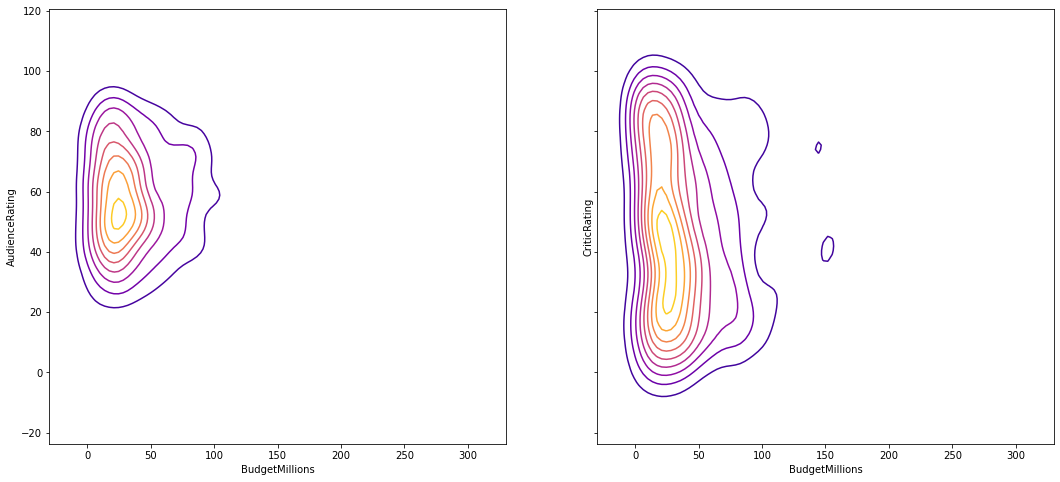

In [20]:
#Subplots
f, axes = plt.subplots(1, 2, figsize=(18,8),sharex=True,sharey=True)
ks1 = sns.kdeplot(movie.BudgetMillions,movie.CriticRating,cmap='plasma',ax=axes[1] )
ks2 = sns.kdeplot(movie.BudgetMillions,movie.AudienceRating,cmap='plasma',ax=axes[0] )
ks1.set(xlim=(-20,120))

[(-20.0, 120.0)]

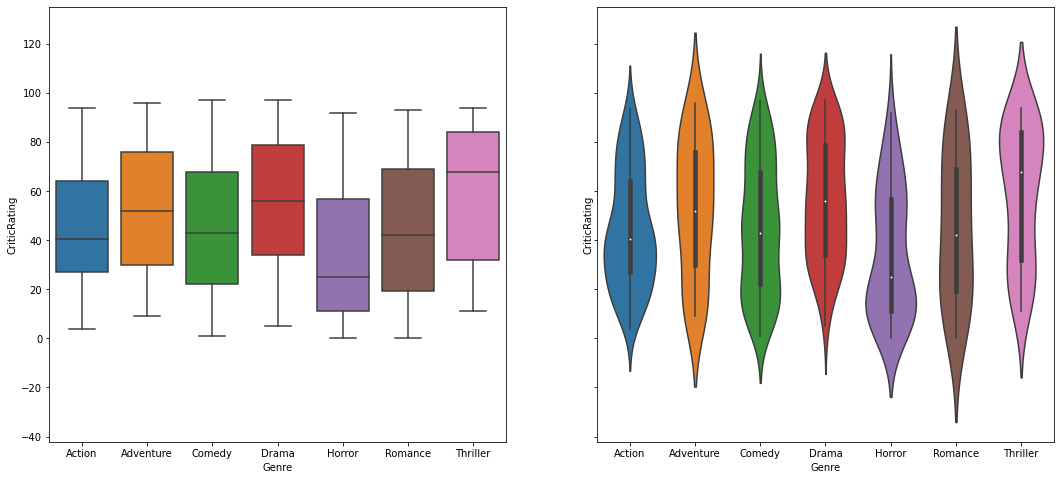

In [21]:
f, axes = plt.subplots(1, 2, figsize=(18,8),sharex=True,sharey=True)
bp = sns.boxplot(data=movie,x="Genre",y='CriticRating', ax=axes[0])
vp = sns.violinplot(data=movie,x="Genre",y='CriticRating', ax=axes[1])
k1.set(xlim=(-20,120))

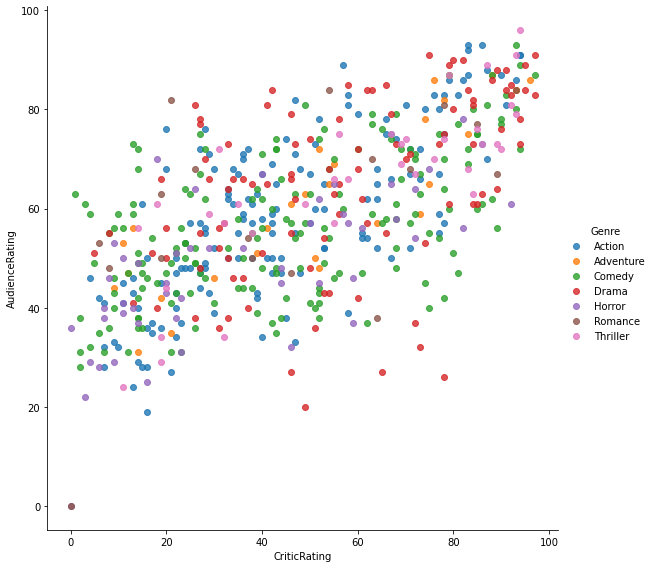

In [22]:
j = sns.lmplot(data=movie,x='CriticRating',y='AudienceRating',hue='Genre',height=8,fit_reg=False)

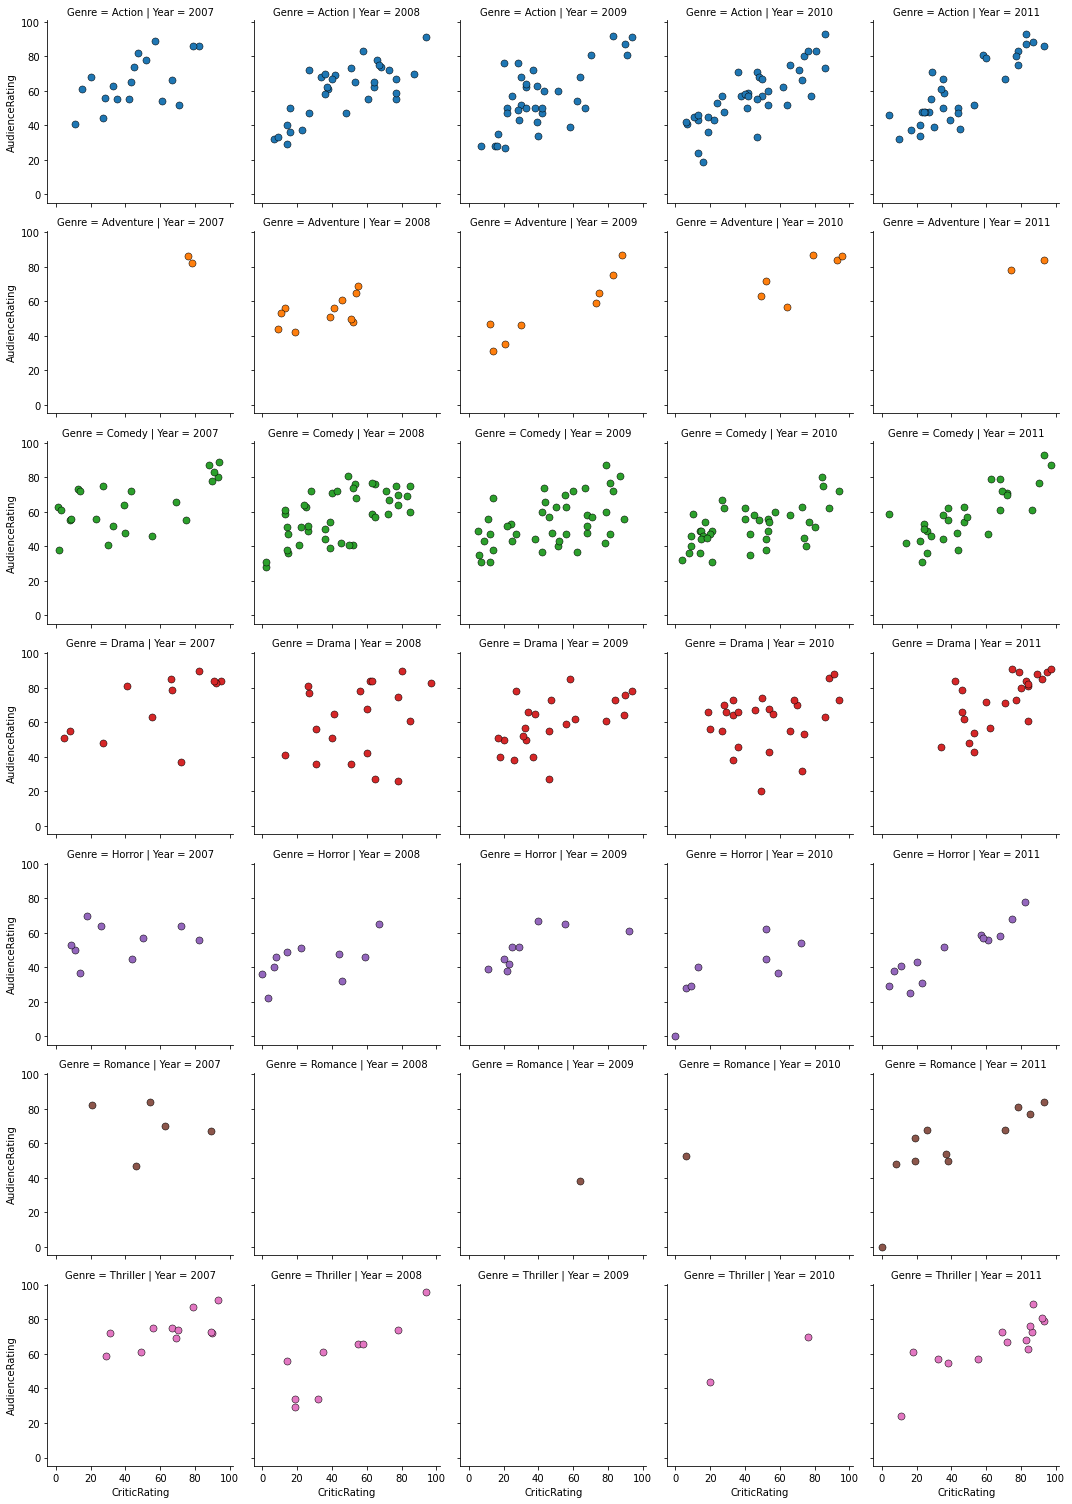

In [23]:
#Facet Grid
g1 = sns.FacetGrid(movie, row = 'Genre', col = 'Year',hue='Genre')
kws= dict(s=50, linewidth=0.5, edgecolor="Black")
g1 = g1.map(plt.scatter,'CriticRating','AudienceRating',**kws )

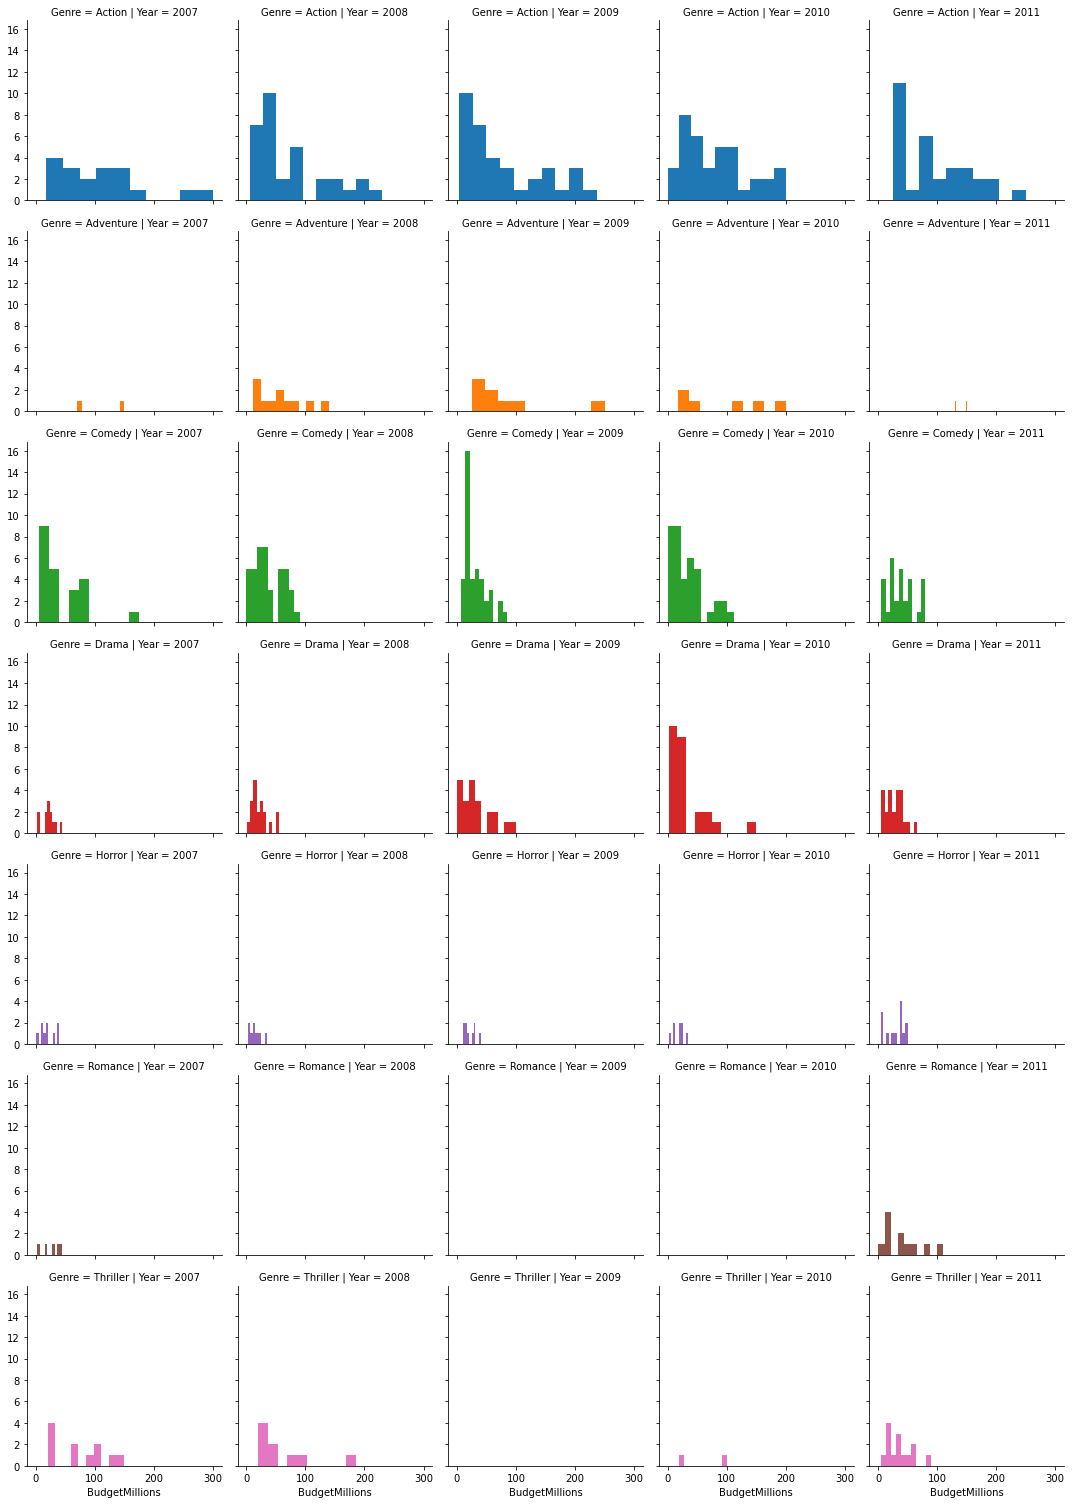

In [24]:
g2 = sns.FacetGrid(movie, row = 'Genre', col = 'Year',hue='Genre')
g2 = g2.map(plt.hist,'BudgetMillions' )

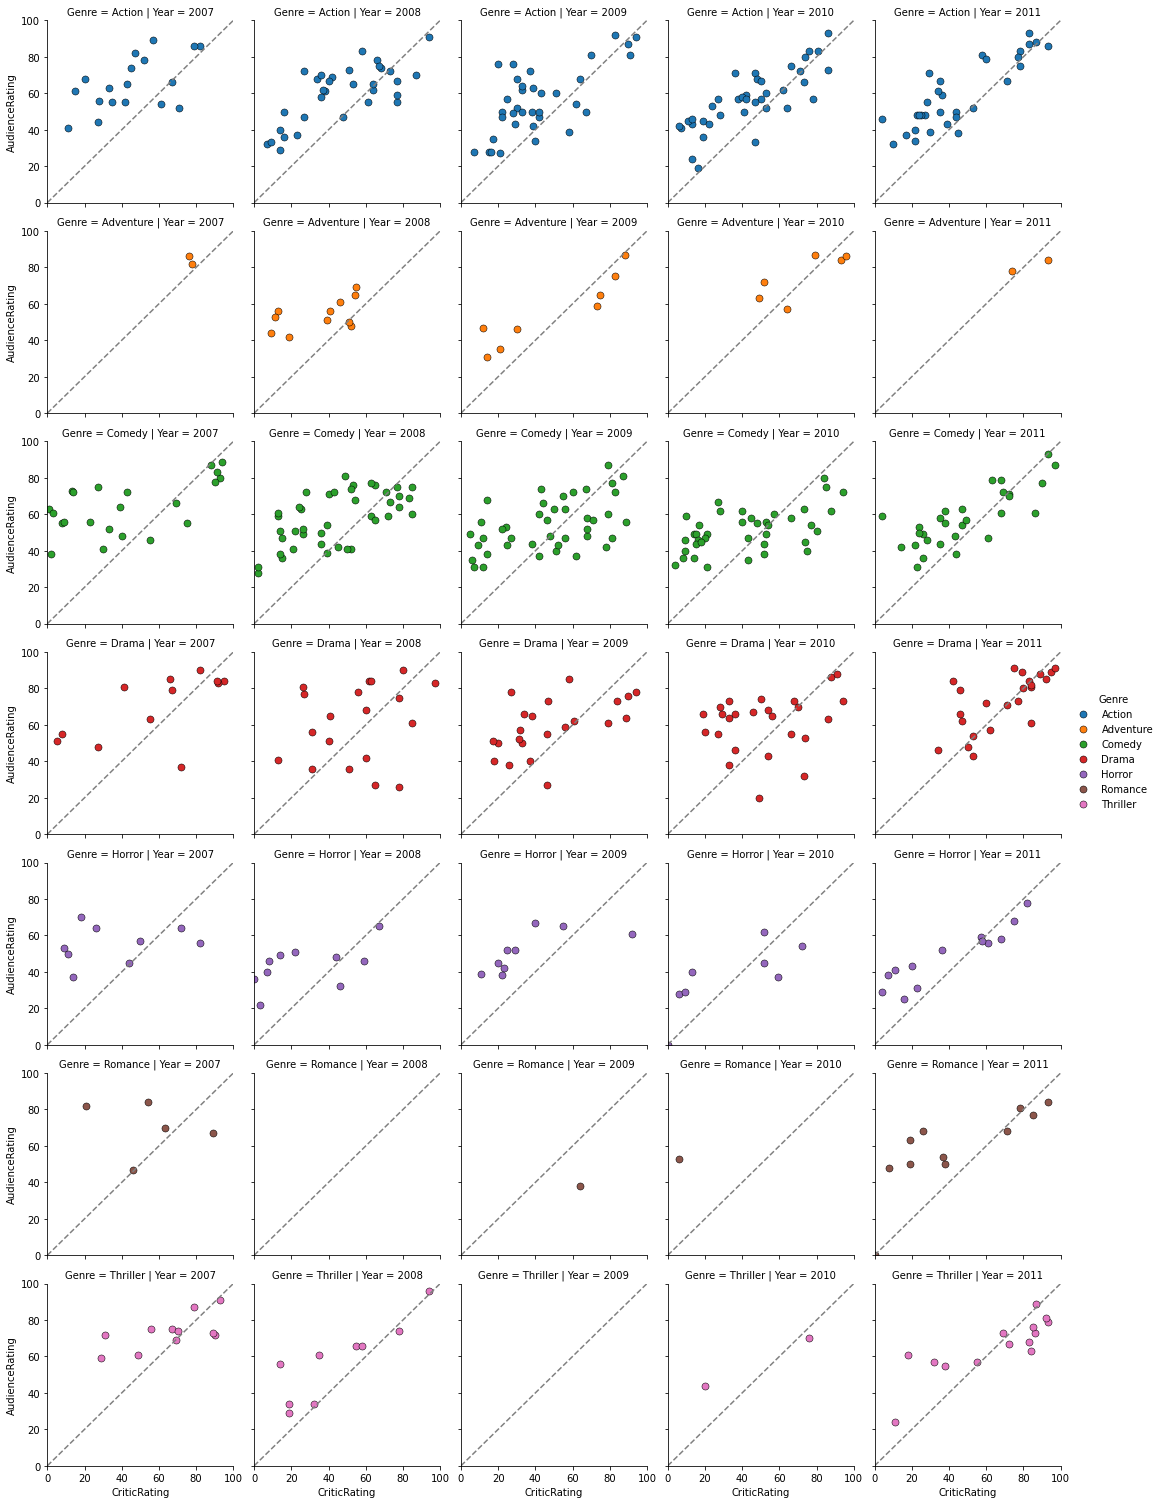

In [25]:
#Controlling axes and adding diagonals
g1 = sns.FacetGrid(movie, row = 'Genre', col = 'Year',hue='Genre')
kws= dict(s=50, linewidth=0.5, edgecolor="Black")
g1 = g1.map(plt.scatter,'CriticRating','AudienceRating',**kws )
g1.set(xlim=(0,100),ylim=(0,100))
for ax in g1.axes.flat:
    ax.plot((0,100), (0,100), c='gray',ls='--')
g1.add_legend()

(array([25., 40., 18.,  8.,  6.,  2.,  1.,  0.,  0.,  1.]),
 array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.]),
 <a list of 10 Patch objects>)

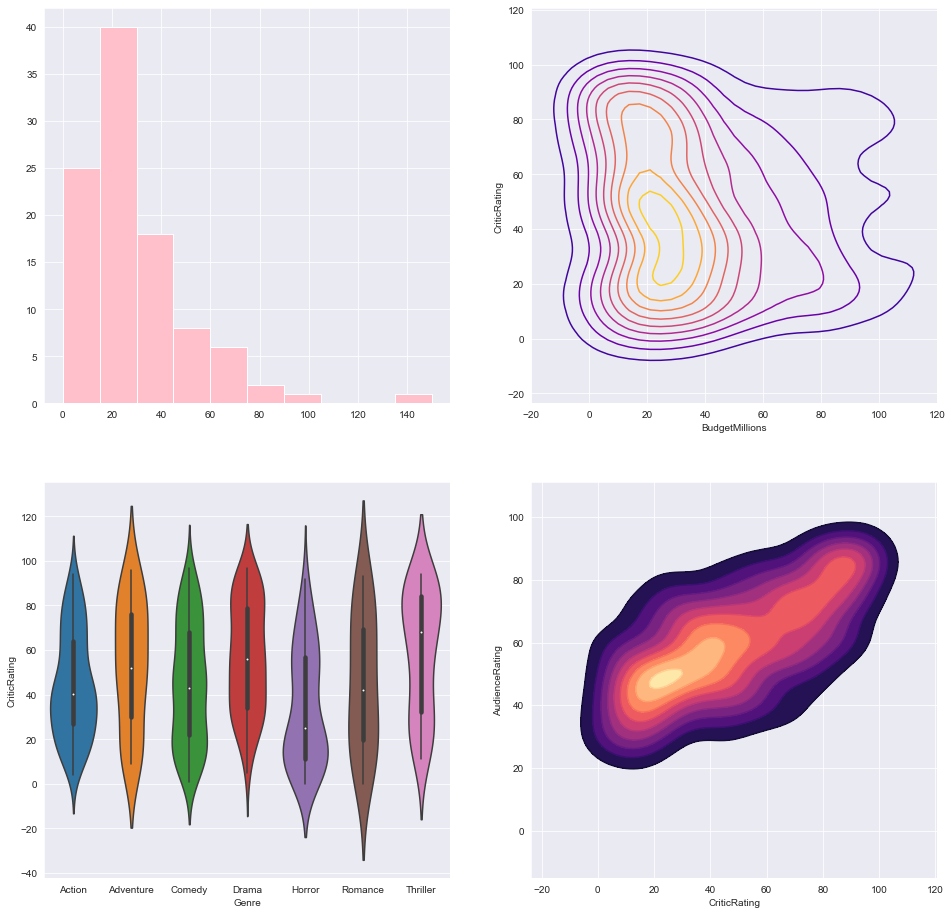

In [34]:
sns.set_style("darkgrid")
f, axes = plt.subplots(2, 2, figsize=(16,16))
ks1 = sns.kdeplot(movie.BudgetMillions,movie.CriticRating,cmap='plasma',ax=axes[0,1] )
##ks2 = sns.kdeplot(movie.BudgetMillions,movie.AudienceRating,cmap='plasma',ax=axes[0,0] )
ks1.set(xlim=(-20,120))
##ks2.set(xlim=(-20,120))
vp = sns.violinplot(data=movie,x="Genre",y='CriticRating', ax=axes[1,0])
k1 = sns.kdeplot(movie.CriticRating,movie.AudienceRating,shade=True, shade_lowest=False, cmap = 'magma',ax=axes[1,1] )
k1b = sns.kdeplot(movie.CriticRating,movie.AudienceRating,cmap = 'magma',ax=axes[1,1] )

## Dashboard for pyplot (not Seaborn)
axes[0,0].hist(movie[movie.Genre == 'Drama'].BudgetMillions, color = "pink")